In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# data load

In [2]:
d1221 = pd.read_feather('d1221_10thr.ftr', use_threads = True, columns = None)

In [3]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import random

2022-06-26 15:02:35.059287: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## mk_cd 함수

In [4]:
## 함수
def mk_cd(x):
    if type(x) == str:
        if x.isalpha():
            return x
        else:
            if len(x) == 6:
                return x
            else:
                return "0"*(6-len(x))+x
    elif type(x) == int:
        x = str(x)
        return "0"*(6-len(x))+x

# 슬라이싱 준비

In [5]:
len_a2012 = sum((20120000<d1221['date'])&(d1221['date']<20130000)) # 107935
len_a2013 = sum((20130000<d1221['date'])&(d1221['date']<20140000))
len_a2014 = sum((20140000<d1221['date'])&(d1221['date']<20150000))
len_a2015 = sum((20150000<d1221['date'])&(d1221['date']<20160000))
len_a2016 = sum((20160000<d1221['date'])&(d1221['date']<20170000))
len_a2017 = sum((20170000<d1221['date'])&(d1221['date']<20180000))
len_a2018 = sum((20180000<d1221['date'])&(d1221['date']<20190000))
len_a2019 = sum((20190000<d1221['date'])&(d1221['date']<20200000))
len_a2020 = sum((20200000<d1221['date'])&(d1221['date']<20210000))
len_a2021 = sum((20210000<d1221['date'])&(d1221['date']<20220000))

In [6]:
len1215 = len_a2012+len_a2013+len_a2014+len_a2015 # y:2015
len1316 = len1215+len_a2016 # y:2016
len1417 = len1316+len_a2017 # y:2017
len1518 = len1417+len_a2018 # y:2018
len1619 = len1518+len_a2019 # y:2019
len1720 = len1619+len_a2020 # y:2020
len1821 = len1720+len_a2021 # y:2021

## [0], [1]은 train 슬라이싱 인덱스, [2]는 test인덱스로 구성

In [7]:
slicing_dic = {'1215':[0, len1215, len_a2015],
               '1316':[len_a2012, len1316, len_a2016],
               '1417':[len_a2012+len_a2013, len1417, len_a2017],
               '1518':[len_a2012+len_a2013+len_a2014, len1518, len_a2018],
               '1619':[len_a2012+len_a2013+len_a2014+len_a2015, len1619, len_a2019],
               '1720':[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016,len1720, len_a2020],
               '1821':[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016+len_a2017,len1821, len_a2021]}

# category to object

In [8]:
d1221['code'] = list(map(mk_cd, d1221['code'])) # mk_cd함수 적용시켜야 ftr만들 때 에러 안남.

In [9]:
d1221.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439871 entries, 0 to 1439870
Columns: 823 entries, date to NextChange
dtypes: float64(821), int64(1), object(1)
memory usage: 8.8+ GB


# reg modeling

In [22]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.get_params()

from sklearn.linear_model import Ridge, Lasso, ElasticNet # Norm 규제 회귀 모델
Ridge = Ridge()
Lasso = Lasso()
ElasticNet = ElasticNet()
'Ridge'
Ridge.get_params()
'Lasso'
Lasso.get_params()
'ElasticNet'
ElasticNet.get_params()

from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
ARDRegression = ARDRegression()
BayesianRidge = BayesianRidge()
'ARDRegression'
ARDRegression.get_params()
'BayesianRidge'
BayesianRidge.get_params()

from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()
'DecisionTree'
DecisionTree.get_params()

from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
RandomForest = RandomForestRegressor()
'RandomForest'
RandomForest.get_params()

from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅
XGBoost = XGBRegressor()
'XGBoost'
XGBoost.get_params()

import lightgbm as lgb
LGBM = lgb()
'LGBM'
LGBM.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

'Ridge'

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

'Lasso'

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

'ElasticNet'

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

'ARDRegression'

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'n_iter': 300,
 'normalize': 'deprecated',
 'threshold_lambda': 10000.0,
 'tol': 0.001,
 'verbose': False}

'BayesianRidge'

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

'DecisionTree'

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

'RandomForest'

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

'XGBoost'

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

TypeError: 'module' object is not callable

In [34]:
results = []
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

def my_regressor():
    X = d1221.iloc[:,2:-1] # 1221 데이터
    y = d1221.iloc[:,-1]
    from sklearn.linear_model import LinearRegression # 일반 회귀 모델
    from sklearn.linear_model import Ridge, Lasso, ElasticNet # Norm 규제 회귀 모델
    from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
    from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅
    import lightgbm as lgb
    from sklearn.model_selection import GridSearchCV
#     from sklearn.model_selection import cross_val_score # model 검증
    
#     from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    
    from sklearn.dummy import DummyRegressor
    from sklearn.metrics import mean_squared_error as mse # 모델 평가 지표 scoring (mse)
    from sklearn.metrics import r2_score as r2
    
    import ast # convert string to function
    
    # seed 고정
    user_seed = 42
    random.seed(user_seed) # seed 고정
    
    # (같은 줄에 써놓은 애들끼리 하이퍼파리미터 구성 비슷하거나 같음)
    Linear = LinearRegression(n_jobs=64)
    Ridge, Lasso, ElasticNet = Ridge(max_iter=100, alpha=0.001, random_state=user_seed), Lasso(alpha=0.001, max_iter=100, random_state=user_seed), ElasticNet(alpha=0.001, max_iter=100, random_state=user_seed)
    # [lasso 학습시간 단축 하이퍼파라미터 참고](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-3-%EC%84%A0%ED%98%95-%EB%AA%A8%EB%8D%B8/comment-page-1/)
    # [elastic net 참고](https://soobarkbar.tistory.com/30)
    # elastic net은 큰 데이터 셋에서 잘 작동함. + ridge&lasso의 장점 모두 가짐.
    # [모델훈련](https://taek98.tistory.com/15)
    ARDR_Linear, Bayesian_Ridge = ARDRegression(verbose = True), BayesianRidge(verbose = True) # n_iter=10, 
    DecisionTree = DecisionTreeRegressor(max_depth = 100, random_state=user_seed, max_leaf_nodes=4)
    Random_Forest = RandomForestRegressor(n_estimators=100,
                                          n_jobs=64,
                                          max_depth=100,
                                          random_state=user_seed,
                                          verbose=2,
                                          max_leaf_nodes=10)
    XGBoost_Linear = XGBRegressor(n_jobs=64, max_depth=100, n_estimators=100, learning_rate=0.001) # 16에서 64로 증가 # , verbosity=2
    LGBM = lgb.LGBMRegressor(num_leaves=31,
                            learning_rate=0.05,
                            n_estimators=100)

    dummy = DummyRegressor(strategy = 'mean')
    
    my_model_list = ['ARDR_Linear', 'Bayesian_Ridge',
                      'DecisionTree', 'Random_Forest',
                      'XGBoost_Linear', 'LGBM'
                     ] # 오래 걸리는걸 앞으로 뺌

# 'Linear', 'Ridge', 'Lasso', 'ElasticNet',
#               'dummy'
#     'DecisionTree', 'Random_Forest',
#      'XGBoost_Linear', 'LGBM', 
# 'ARDR_Linear', 'Bayesian_Ridge'
    i = 0
    
    ######################################################################### fitting
    for model_nm in tqdm(my_model_list):
        cntcnt = 0
        # cv
        for slicer in slicing_dic:
            tmpX = X[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True)
            tmpy = y[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True)
#             tmp_all = d1221[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True) # 전체데이터

            X_train = tmpX[:-slicing_dic[slicer][2]]
            X_test = tmpX[-slicing_dic[slicer][2]:]
            y_train = tmpy[:-slicing_dic[slicer][2]]
            y_test = tmpy[-slicing_dic[slicer][2]:]
            
            # train끼리 idx 같아야 하므로
            len_train = slicing_dic[slicer][1]-(slicing_dic[slicer][2]+slicing_dic[slicer][0]) # 혹은 tmp_train.shape[0]
            len(list(range(len_train)))
            train_idx = list(range(len_train))
            random.shuffle(train_idx) # 자동으로 덮어쓰기

            len_train_to_test = slicing_dic[slicer][1]-slicing_dic[slicer][0]
            test_idx = list(range(len_train,len_train_to_test)) # +1 안해줘도 되는 거 위 cell에서 확인
            len(test_idx)
            random.shuffle(test_idx) # 자동으로 덮어쓰기
            
            X_train = X_train.loc[train_idx]
            y_train = y_train.loc[train_idx]
            X_test = X_test.loc[test_idx]
            y_test = y_test.loc[test_idx]
            ###########################################
            y_train = np.array(y_train).reshape(-1,1) # 1열짜리로 만드는 것
            y_test = np.array(y_test).reshape(-1,1)

            ######################################################## cv를 위한 데이터 slicing 작업 끝

            # fitting은 cv 안에 넣기
            if model_nm == 'LGBM':
                model_ = eval(model_nm).fit(X_train, y_train,
                                            eval_set=[(X_test, y_test)],
                                            eval_metric='l1',
                                            early_stopping_rounds=5)
                y_pred_test = model_.predict(X_test, num_iteration=gbm.best_iteration_) # 예측

            elif model_nm == 'XGBoost_Linear': # xgboost_linear가 느려서
                cntcnt += 1
                print(f'$$$$$---{cntcnt}')
                model_ = eval(model_nm).fit(X_train, y_train,
                                            eval_set=[(X_test, y_test)],
                                            eval_metric='rmse',
                                            early_stopping_rounds=5) # ,verbose = True
                y_pred_test = model_.predict(X_test) # 예측
                
            else:
                cntcnt += 1
                print(f'$$$$$---{cntcnt}')
                model_ = eval(model_nm).fit(X_train, y_train)
                y_pred_test = model_.predict(X_test) # 예측

            mse_score = mse(y_test, y_pred_test)
            r2_score = r2(y_test, y_pred_test)
            r2_score = adj_r2(r2_score, X_test.shape[0], X_test.shape[1])
#             cv_scores = cross_val_score(eval(model_nm), tmpX, tmpy, cv=7)

            results.append([i, f'{model_nm}', mse_score, r2_score]) # , cv_scores #[:str(model).index("(")]
            i+=1
        ################################################################
        print(results[-7:])
    return results#score_dic#[0]

In [35]:
# 최종
import time
start = time.time()
_ = my_regressor()
results
time.time()-start

  0%|                                                     | 0/6 [00:00<?, ?it/s]

$$$$$---1
$$$$$---2
$$$$$---3
$$$$$---4
$$$$$---5
$$$$$---6
$$$$$---7


 17%|███████▌                                     | 1/6 [00:34<02:54, 34.96s/it]

[[0, 'ARDR_Linear', 22.786038717963855, -0.0059660595264114935], [1, 'ARDR_Linear', 18.93581198386515, -0.006190083968894644], [2, 'ARDR_Linear', 18.151718651034788, -0.007881519484836952], [3, 'ARDR_Linear', 21.499064874539307, -0.005561123526085732], [4, 'ARDR_Linear', 19.93132568806165, -0.006181736625930467], [5, 'ARDR_Linear', 27.322843262729894, -0.005464481673178367], [6, 'ARDR_Linear', 18.992690427306236, -0.003719407734845248]]
$$$$$---1
Convergence after  13  iterations
$$$$$---2
Convergence after  34  iterations
$$$$$---3
Convergence after  88  iterations
$$$$$---4
Convergence after  79  iterations
$$$$$---5
Convergence after  92  iterations
$$$$$---6
Convergence after  244  iterations
$$$$$---7


 33%|███████████████                              | 2/6 [02:13<04:49, 72.27s/it]

Convergence after  24  iterations
[[7, 'Bayesian_Ridge', 98.05605139771679, -3.329013079378063], [8, 'Bayesian_Ridge', 25.463970351951076, -0.35307609139987073], [9, 'Bayesian_Ridge', 18.229786177102323, -0.012216250443818577], [10, 'Bayesian_Ridge', 22.10722667013687, -0.034006261118603165], [11, 'Bayesian_Ridge', 19.970941580925178, -0.008181643130056537], [12, 'Bayesian_Ridge', 27.42648235386957, -0.009278338966572708], [13, 'Bayesian_Ridge', 799.1911159050828, -41.23538716610211]]
$$$$$---1
$$$$$---2
$$$$$---3
$$$$$---4
$$$$$---5
$$$$$---6
$$$$$---7


 50%|██████████████████████                      | 3/6 [14:46<19:10, 383.37s/it]

[[14, 'DecisionTree', 22.794256645140234, -0.006328867468653021], [15, 'DecisionTree', 18.962713880277686, -0.007619566973547931], [16, 'DecisionTree', 18.12400048833856, -0.00634245729063454], [17, 'DecisionTree', 21.517625915634305, -0.006429266463753969], [18, 'DecisionTree', 19.81580289630115, -0.0003498654773355092], [19, 'DecisionTree', 27.269565673037235, -0.003503897864604033], [20, 'DecisionTree', 19.032642691370288, -0.005830791742157171]]
$$$$$---1


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100building tree 33 of 100

building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  1.6min remaining:  5.2min


building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  2.9min remaining:   57.7s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---2


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  2.0min remaining:  6.4min


building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  3.5min remaining:  1.2min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  4.7min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---3


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100

b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  2.8min remaining:  8.7min


building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  4.8min remaining:  1.6min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  6.2min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---4


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  2.9min remaining:  9.1min


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  5.0min remaining:  1.7min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  6.5min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---5


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100building tree 38 of 100
building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  2.4min remaining:  7.6min


building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  4.5min remaining:  1.5min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  5.6min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---6


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100building tree 36 of 100
building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100
bu

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  2.4min remaining:  7.6min


building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  4.1min remaining:  1.4min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.0s finished


$$$$$---7


[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:  3.2min remaining: 10.1min


building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:  5.4min remaining:  1.8min
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:  6.4min finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  24 out of 100 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=64)]: Done  75 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.2s finished
 67%|████████████████████████████▋              | 4/6 [53:18<38:08, 1144.50s/it]

[[21, 'Random_Forest', 22.88585333075023, -0.010372710193107038], [22, 'Random_Forest', 18.881721243137594, -0.0033158704415854334], [23, 'Random_Forest', 18.076498324549483, -0.003704880434196367], [24, 'Random_Forest', 21.4077012724004, -0.0012878359690537966], [25, 'Random_Forest', 19.839961475390606, -0.0015694492342357425], [26, 'Random_Forest', 27.305390703203532, -0.00482223779872859], [27, 'Random_Forest', 18.94381483551618, -0.0011364466619019353]]
$$$$$---1
[0]	validation_0-rmse:4.78625
[1]	validation_0-rmse:4.78614
[2]	validation_0-rmse:4.78604
[3]	validation_0-rmse:4.78593
[4]	validation_0-rmse:4.78584
[5]	validation_0-rmse:4.78574
[6]	validation_0-rmse:4.78565
[7]	validation_0-rmse:4.78555
[8]	validation_0-rmse:4.78547
[9]	validation_0-rmse:4.78538
[10]	validation_0-rmse:4.78530
[11]	validation_0-rmse:4.78522
[12]	validation_0-rmse:4.78515
[13]	validation_0-rmse:4.78508
[14]	validation_0-rmse:4.78501
[15]	validation_0-rmse:4.78495
[16]	validation_0-rmse:4.78489
[17]	valida

[67]	validation_0-rmse:4.28518
[68]	validation_0-rmse:4.28514
[69]	validation_0-rmse:4.28511
[70]	validation_0-rmse:4.28508
[71]	validation_0-rmse:4.28505
[72]	validation_0-rmse:4.28502
[73]	validation_0-rmse:4.28499
[74]	validation_0-rmse:4.28496
[75]	validation_0-rmse:4.28494
[76]	validation_0-rmse:4.28492
[77]	validation_0-rmse:4.28489
[78]	validation_0-rmse:4.28488
[79]	validation_0-rmse:4.28486
[80]	validation_0-rmse:4.28484
[81]	validation_0-rmse:4.28483
[82]	validation_0-rmse:4.28481
[83]	validation_0-rmse:4.28480
[84]	validation_0-rmse:4.28479
[85]	validation_0-rmse:4.28478
[86]	validation_0-rmse:4.28477
[87]	validation_0-rmse:4.28476
[88]	validation_0-rmse:4.28476
[89]	validation_0-rmse:4.28474
[90]	validation_0-rmse:4.28475
[91]	validation_0-rmse:4.28474
[92]	validation_0-rmse:4.28473
[93]	validation_0-rmse:4.28472
[94]	validation_0-rmse:4.28471
[95]	validation_0-rmse:4.28470
[96]	validation_0-rmse:4.28469
[97]	validation_0-rmse:4.28467
[98]	validation_0-rmse:4.28465
[99]	val

[19]	validation_0-rmse:4.37532
[20]	validation_0-rmse:4.37527
[21]	validation_0-rmse:4.37522
[22]	validation_0-rmse:4.37517
[23]	validation_0-rmse:4.37512
[24]	validation_0-rmse:4.37508
[25]	validation_0-rmse:4.37500
[26]	validation_0-rmse:4.37495
[27]	validation_0-rmse:4.37488
[28]	validation_0-rmse:4.37483
[29]	validation_0-rmse:4.37476
[30]	validation_0-rmse:4.37472
[31]	validation_0-rmse:4.37464
[32]	validation_0-rmse:4.37460
[33]	validation_0-rmse:4.37452
[34]	validation_0-rmse:4.37447
[35]	validation_0-rmse:4.37440
[36]	validation_0-rmse:4.37435
[37]	validation_0-rmse:4.37429
[38]	validation_0-rmse:4.37425
[39]	validation_0-rmse:4.37419
[40]	validation_0-rmse:4.37415
[41]	validation_0-rmse:4.37412
[42]	validation_0-rmse:4.37406
[43]	validation_0-rmse:4.37402
[44]	validation_0-rmse:4.37397
[45]	validation_0-rmse:4.37393
[46]	validation_0-rmse:4.37387
[47]	validation_0-rmse:4.37384
[48]	validation_0-rmse:4.37379
[49]	validation_0-rmse:4.37375
[50]	validation_0-rmse:4.37370
[51]	val

 83%|████████████████████████████████▌      | 5/6 [3:28:27<1:08:08, 4088.72s/it]

[[28, 'XGBoost_Linear', 22.873914048915722, -0.009845610575254016], [29, 'XGBoost_Linear', 19.109965420662526, -0.015444055298136972], [30, 'XGBoost_Linear', 18.358233226119445, -0.01934832479036208], [31, 'XGBoost_Linear', 21.74550256960771, -0.01708758604798022], [32, 'XGBoost_Linear', 20.1807026562929, -0.01877089175271296], [33, 'XGBoost_Linear', 27.34626217395202, -0.006326283763351981], [34, 'XGBoost_Linear', 19.117569613185157, -0.010318981553444573]]
[1]	valid_0's l1: 3.09536	valid_0's l2: 22.7712
[2]	valid_0's l1: 3.09455	valid_0's l2: 22.7565
[3]	valid_0's l1: 3.0939	valid_0's l2: 22.7465
[4]	valid_0's l1: 3.09323	valid_0's l2: 22.7356
[5]	valid_0's l1: 3.09272	valid_0's l2: 22.7282
[6]	valid_0's l1: 3.09214	valid_0's l2: 22.7192
[7]	valid_0's l1: 3.0918	valid_0's l2: 22.7134
[8]	valid_0's l1: 3.09142	valid_0's l2: 22.7073
[9]	valid_0's l1: 3.09105	valid_0's l2: 22.7001
[10]	valid_0's l1: 3.09075	valid_0's l2: 22.6946
[11]	valid_0's l1: 3.09034	valid_0's l2: 22.6871
[12]	vali

 83%|██████████████████████████████████▏      | 5/6 [3:29:38<41:55, 2515.77s/it]

[45]	valid_0's l1: 3.08666	valid_0's l2: 22.6496


NameError: name 'gbm' is not defined

## plot을 위한 준비

In [37]:
results

[[0, 'ARDR_Linear', 22.786038717963855, -0.0059660595264114935],
 [1, 'ARDR_Linear', 18.93581198386515, -0.006190083968894644],
 [2, 'ARDR_Linear', 18.151718651034788, -0.007881519484836952],
 [3, 'ARDR_Linear', 21.499064874539307, -0.005561123526085732],
 [4, 'ARDR_Linear', 19.93132568806165, -0.006181736625930467],
 [5, 'ARDR_Linear', 27.322843262729894, -0.005464481673178367],
 [6, 'ARDR_Linear', 18.992690427306236, -0.003719407734845248],
 [7, 'Bayesian_Ridge', 98.05605139771679, -3.329013079378063],
 [8, 'Bayesian_Ridge', 25.463970351951076, -0.35307609139987073],
 [9, 'Bayesian_Ridge', 18.229786177102323, -0.012216250443818577],
 [10, 'Bayesian_Ridge', 22.10722667013687, -0.034006261118603165],
 [11, 'Bayesian_Ridge', 19.970941580925178, -0.008181643130056537],
 [12, 'Bayesian_Ridge', 27.42648235386957, -0.009278338966572708],
 [13, 'Bayesian_Ridge', 799.1911159050828, -41.23538716610211],
 [14, 'DecisionTree', 22.794256645140234, -0.006328867468653021],
 [15, 'DecisionTree', 18.

In [36]:
model_list = ['ARDR_Linear', 'Bayesian_Ridge',
              'DecisionTree', 'Random_Forest',
              'XGBoost_Linear']
# , 'LGBM'
# ['linear', 'ridge', 'lasso', 'elasticnet', 'ardr_linear', 'bayesian_ridge', 'DecisionTree', 'random_forest', 'xgboost_linear', 'lgbm', 'dummy']
mse_dic = {i:[] for i in model_list}
r2_dic = {i:[] for i in model_list}

for i in results:
    mse_dic[i[1]].append(i[2])
    r2_dic[i[1]].append(i[3])



# import math
# 리스트에 mean 함수가 내장이 안돼있다니...
mean_mse_score = {i:[] for i in model_list}
mean_r2_score = {i:[] for i in model_list}

for i in model_list:
    mean_mse_score[i] = sum(mse_dic[i])/len(mse_dic[i])
    mean_r2_score[i] = sum(r2_dic[i])/len(r2_dic[i])



# 정렬
mse_score_lst = sorted(mean_mse_score.items(), key = lambda t : t[1], reverse = True) #mse 큰 순으로 줄 세워짐. (클 수혹 안좋으니까)
r2_score_lst = sorted(mean_r2_score.items(), key = lambda t : t[1]) #r2 작은 순으로 줄 세워짐.

mse_score_lst
r2_score_lst


[('Bayesian_Ridge', 144.34936777668352),
 ('XGBoost_Linear', 21.247449958390785),
 ('ARDR_Linear', 21.088499086500125),
 ('DecisionTree', 21.073801170014207),
 ('Random_Forest', 21.048705883564004)]

[('Bayesian_Ridge', -6.425879832934156),
 ('XGBoost_Linear', -0.013877390540177543),
 ('ARDR_Linear', -0.005852058934311843),
 ('DecisionTree', -0.0052006733258123106),
 ('Random_Forest', -0.0037442043904012717)]

In [33]:
results

[[0, 'dummy', 22.786038717963855, -0.0059660595264114935],
 [1, 'dummy', 18.93581198386515, -0.006190083968894644],
 [2, 'dummy', 18.151718651034788, -0.007881519484836952],
 [3, 'dummy', 21.499064874539307, -0.005561123526085732],
 [4, 'dummy', 19.93132568806165, -0.006181736625930467],
 [5, 'dummy', 27.322843262729894, -0.005464481673178367],
 [6, 'dummy', 18.992690427306236, -0.003719407734845248],
 [7, 'Linear', 23.144153149002566, -0.021776221508079452],
 [8, 'Linear', 19.099532519188003, -0.014889683401139386],
 [9, 'Linear', 18.257382375762752, -0.01374854053560548],
 [10, 'Linear', 22.40251762712001, -0.047817703997809824],
 [11, 'Linear', 20.08533689544233, -0.01395659648861236],
 [12, 'Linear', 27.862821133006868, -0.025335348121166668],
 [13, 'Linear', 19.381244241814468, -0.024253570920625966],
 [14, 'Ridge', 23.443555349635453, -0.034994335271168575],
 [15, 'Ridge', 19.08382900200906, -0.014055247397954052],
 [16, 'Ridge', 18.256375718559454, -0.013692645487253907],
 [17, 

In [31]:
model_list = ['Linear', 'Ridge', 'Lasso', 'ElasticNet',
              'dummy']
# 'ARDR_Linear', 'Bayesian_Ridge',
#               'DecisionTree', 'Random_Forest',
#               'XGBoost_Linear', 'LGBM', 
# ['linear', 'ridge', 'lasso', 'elasticnet', 'ardr_linear', 'bayesian_ridge', 'DecisionTree', 'random_forest', 'xgboost_linear', 'lgbm', 'dummy']
mse_dic = {i:[] for i in model_list}
r2_dic = {i:[] for i in model_list}

for i in results:
    mse_dic[i[1]].append(i[2])
    r2_dic[i[1]].append(i[3])



# import math
# 리스트에 mean 함수가 내장이 안돼있다니...
mean_mse_score = {i:[] for i in model_list}
mean_r2_score = {i:[] for i in model_list}

for i in model_list:
    mean_mse_score[i] = sum(mse_dic[i])/len(mse_dic[i])
    mean_r2_score[i] = sum(r2_dic[i])/len(r2_dic[i])



# 정렬
mse_score_lst = sorted(mean_mse_score.items(), key = lambda t : t[1], reverse = True) #mse 큰 순으로 줄 세워짐. (클 수혹 안좋으니까)
r2_score_lst = sorted(mean_r2_score.items(), key = lambda t : t[1]) #r2 작은 순으로 줄 세워짐.

mse_score_lst
r2_score_lst


[('Ridge', 21.502733897131588),
 ('Linear', 21.461855420191),
 ('ElasticNet', 21.138967409525016),
 ('Lasso', 21.13665694812988),
 ('dummy', 21.088499086500125)]

[('Ridge', -0.024757942775296637),
 ('Linear', -0.023111094996148447),
 ('ElasticNet', -0.008073410622823232),
 ('Lasso', -0.007995801063996413),
 ('dummy', -0.005852058934311843)]

In [39]:
mean_mse_score

{'ARDR_Linear': 21.088499086500125,
 'Bayesian_Ridge': 144.34936777668352,
 'DecisionTree': 21.073801170014207,
 'Random_Forest': 21.048705883564004,
 'XGBoost_Linear': 21.247449958390785}

In [40]:
mean_r2_score

{'ARDR_Linear': -0.005852058934311843,
 'Bayesian_Ridge': -6.425879832934156,
 'DecisionTree': -0.0052006733258123106,
 'Random_Forest': -0.0037442043904012717,
 'XGBoost_Linear': -0.013877390540177543}

In [44]:
mean_mse_score = {'ARDR_Linear': 21.088499086500125,
 'Bayesian_Ridge': 144.34936777668352,
 'DecisionTree': 21.073801170014207,
 'Random_Forest': 21.048705883564004,
 'XGBoost_Linear': 21.247449958390785,
 'Ridge': 21.502733897131588,
 'Linear': 21.461855420191,
 'ElasticNet': 21.138967409525016,
 'Lasso': 21.13665694812988,
 'dummy': 21.088499086500125}

mean_r2_score = {'ARDR_Linear': -0.005852058934311843,
 'Bayesian_Ridge': -6.425879832934156,
 'DecisionTree': -0.0052006733258123106,
 'Random_Forest': -0.0037442043904012717,
 'XGBoost_Linear': -0.013877390540177543,
 'Ridge': -0.024757942775296637,
 'Linear': -0.023111094996148447,
 'ElasticNet': -0.008073410622823232,
 'Lasso': -0.007995801063996413,
 'dummy': -0.005852058934311843}

# 정렬
mse_score_lst = sorted(mean_mse_score.items(), key = lambda t : t[1], reverse = True) #mse 큰 순으로 줄 세워짐. (클 수혹 안좋으니까)
r2_score_lst = sorted(mean_r2_score.items(), key = lambda t : t[1]) #r2 작은 순으로 줄 세워짐.

mse_score_lst
r2_score_lst

[('Bayesian_Ridge', 144.34936777668352),
 ('Ridge', 21.502733897131588),
 ('Linear', 21.461855420191),
 ('XGBoost_Linear', 21.247449958390785),
 ('ElasticNet', 21.138967409525016),
 ('Lasso', 21.13665694812988),
 ('ARDR_Linear', 21.088499086500125),
 ('dummy', 21.088499086500125),
 ('DecisionTree', 21.073801170014207),
 ('Random_Forest', 21.048705883564004)]

[('Bayesian_Ridge', -6.425879832934156),
 ('Ridge', -0.024757942775296637),
 ('Linear', -0.023111094996148447),
 ('XGBoost_Linear', -0.013877390540177543),
 ('ElasticNet', -0.008073410622823232),
 ('Lasso', -0.007995801063996413),
 ('ARDR_Linear', -0.005852058934311843),
 ('dummy', -0.005852058934311843),
 ('DecisionTree', -0.0052006733258123106),
 ('Random_Forest', -0.0037442043904012717)]

In [45]:
# 다시 dic
mse_score_dic = {}
r2_score_dic = {}


for i in mse_score_lst:
    mse_score_dic[i[0]] = i[1]
r2_score_dic = {i[0]:i[1] for i in r2_score_lst}


In [46]:
mse_df = pd.DataFrame(mse_score_dic.items(), columns=['key', 'value'])
mse_df

r2_df = pd.DataFrame(r2_score_dic.items(), columns=['key', 'value'])
r2_df


,key,value
0,Bayesian_Ridge,144.349368
1,Ridge,21.502734
2,Linear,21.461855
3,XGBoost_Linear,21.247450
4,ElasticNet,21.138967
5,Lasso,21.136657
6,ARDR_Linear,21.088499
7,dummy,21.088499
8,DecisionTree,21.073801
9,Random_Forest,21.048706


,key,value
0,Bayesian_Ridge,-6.425880
1,Ridge,-0.024758
2,Linear,-0.023111
3,XGBoost_Linear,-0.013877
4,ElasticNet,-0.008073
5,Lasso,-0.007996
6,ARDR_Linear,-0.005852
7,dummy,-0.005852
8,DecisionTree,-0.005201
9,Random_Forest,-0.003744


## MSE plot

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1500x900 with 0 Axes>

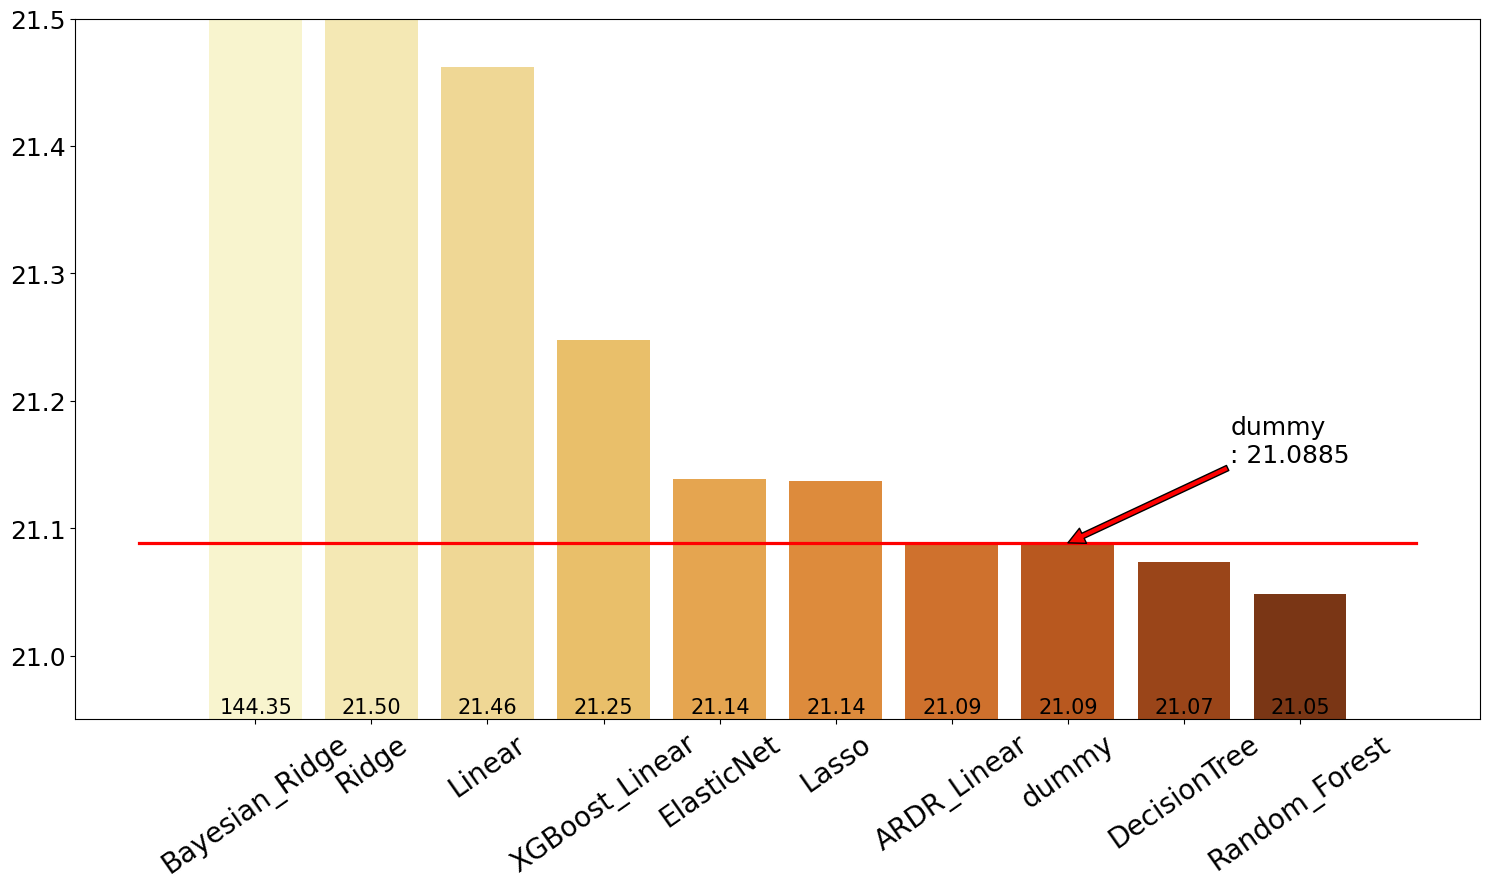

In [53]:
plt.figure(figsize=(15,9), dpi = 100)
g = sns.barplot(x = 'key', y = 'value', data=mse_df, capsize=.2,
                palette = "YlOrBr")
_ = g.set_xticks(range(len(mse_df)))
_ = g.set_xticklabels(g.get_xticklabels(), rotation=35, fontsize = 20)
_ = plt.setp(g.get_yticklabels(), fontsize =18)
_ = g.set_xlabel("", fontsize = 28)
_ = g.set_ylabel("", fontsize = 25)
_ = g.set_ylim([20.95, 21.5]) # g.set_ylim([0, 18]) # ax.set(ylim=(0.4, 0.6))

mse_dummy_mean = mse_df[mse_df.key=='dummy']['value'].values
_ = g.plot([-1,len(mse_df)], [mse_dummy_mean, mse_dummy_mean], color = 'red', linewidth = 2.3)
_ = g.annotate(text = f'dummy\n: {mse_dummy_mean[0]:.4f}', xy = (7, mse_dummy_mean), xytext = (8.4, 21.1522),
               arrowprops = dict(facecolor = 'red', shrink = 0), fontsize = 18)


val = mse_df['value']
# val = mse_df['value'].sort_values(ascending = False).reset_index(drop = True)
cnt = 0
for i in range(len(mse_df)):
    tmp_fval = f'{val[i]:.2f}'
    if tmp_fval.index('.') == 3:
        _ = g.text(cnt-0.305, 20.955, tmp_fval, fontsize=15)
    elif tmp_fval.index('.') == 2:
        _ = g.text(cnt-0.255, 20.955, tmp_fval, fontsize=15)
    cnt += 1

plt.tight_layout()
plt.savefig('[15w] -5 10thr_hpt mse_reg_plot.png')

## R2 plot

<Figure size 1500x900 with 0 Axes>

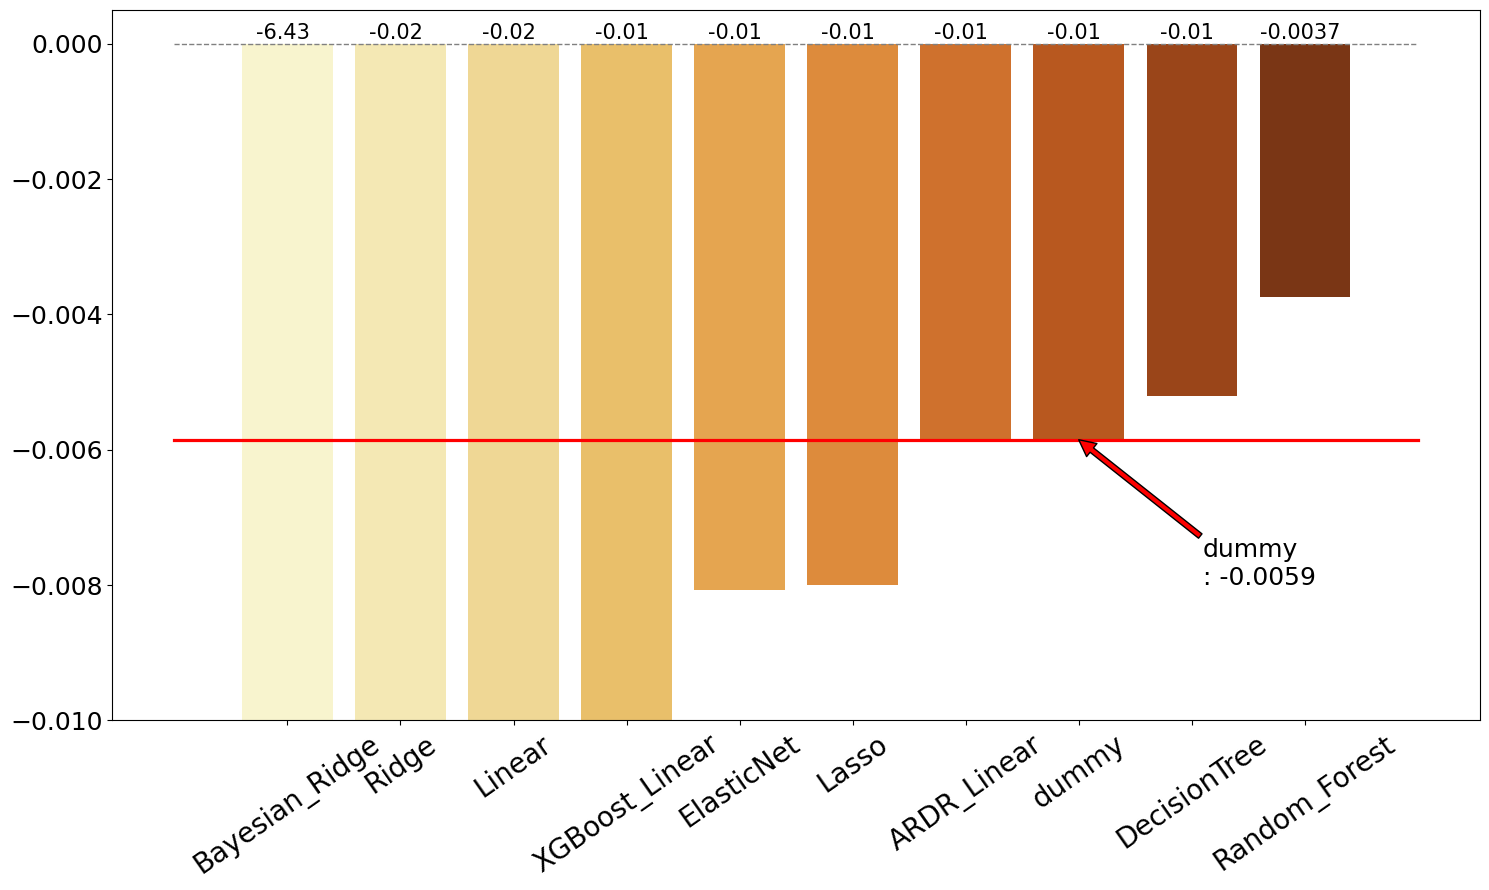

In [66]:
plt.figure(figsize=(15,9), dpi = 100)
g = sns.barplot(x = 'key', y = 'value', data=r2_df, capsize=.2, palette = "YlOrBr")
_ = g.set_xticks(range(len(r2_df)))
_ = g.set_xticklabels(g.get_xticklabels(), rotation=35, fontsize = 20)
_ = plt.setp(g.get_yticklabels(), fontsize =18)
_ = g.set_xlabel("", fontsize = 28)
_ = g.set_ylabel("", fontsize = 25)
_ = g.set_ylim([-0.01, 0.0005]) # ax.set(ylim=(0.4, 0.6))
r2_dummy_mean = r2_df[r2_df.key=='dummy']['value'].values
_ = g.plot([-1,len(r2_df)], [r2_dummy_mean, r2_dummy_mean], color = 'red', linewidth = 2.3)
_ = g.plot([-1,len(r2_df)], [0, 0], color = 'gray', linestyle = '--', linewidth = 1)
_ = g.annotate(text = f'dummy\n: {r2_dummy_mean[0]:.4f}', xy = (7, r2_dummy_mean), xytext = (8.1, -0.008),
               arrowprops = dict(facecolor = 'red', shrink = 0), fontsize = 18)


val = r2_df['value']
cnt = 0
for i in range(len(r2_df)):
    if f'{val[i]:.2f}'[-1] != '0' or f'{val[i]:.2f}'[-2] != '0':
        _ = g.text(cnt-0.28, 0.00007, f'{val[i]:.2f}', fontsize = 15)
    
    elif f'{val[i]:.2f}'[-1] == '0' and val[i] < 0:
#         tmp_val = f'{val[i]:.4f}'[-4:]
#         _ = g.text(cnt-0.47, -0.0001, f'-{tmp_val}'[:3]+'\n'+f'-{tmp_val}'[3:], fontsize = 15)
#         _ = g.text(cnt-0.47, -0.000125, f'{val[i]:.4f}'[:5]+'\n'+'    '+f'{val[i]:.4f}'[5:], fontsize = 15)
        _ = g.text(cnt-0.40, 0.00007, f'{val[i]:.4f}', fontsize = 15)


    elif val[i] > 0:
#         _ = g.text(cnt-0.4, 0.0, f'{val[i]:.4f}'[:4]+'\n'+'   '+f'{val[i]:.4f}'[4:], fontsize = 15)
        _ = g.text(cnt-0.37, 0.002, f'{val[i]:.4f}', fontsize = 15)
    cnt += 1

plt.tight_layout()
plt.savefig('[15w] -5 10thr_hpt r2_reg_plot.png')

# [r2 info](https://vitalflux.com/r-squared-explained-machine-learning/)

## 테스트 데이터셋 정확도 플랏 (유의성 기호 추가)

In [95]:
reg_results = [[0, 'ARDR_Linear', 22.786038717963855, -0.0059660595264114935],
 [1, 'ARDR_Linear', 18.93581198386515, -0.006190083968894644],
 [2, 'ARDR_Linear', 18.151718651034788, -0.007881519484836952],
 [3, 'ARDR_Linear', 21.499064874539307, -0.005561123526085732],
 [4, 'ARDR_Linear', 19.93132568806165, -0.006181736625930467],
 [5, 'ARDR_Linear', 27.322843262729894, -0.005464481673178367],
 [6, 'ARDR_Linear', 18.992690427306236, -0.003719407734845248],
 [7, 'Bayesian_Ridge', 98.05605139771679, -3.329013079378063],
 [8, 'Bayesian_Ridge', 25.463970351951076, -0.35307609139987073],
 [9, 'Bayesian_Ridge', 18.229786177102323, -0.012216250443818577],
 [10, 'Bayesian_Ridge', 22.10722667013687, -0.034006261118603165],
 [11, 'Bayesian_Ridge', 19.970941580925178, -0.008181643130056537],
 [12, 'Bayesian_Ridge', 27.42648235386957, -0.009278338966572708],
 [13, 'Bayesian_Ridge', 799.1911159050828, -41.23538716610211],
 [14, 'DecisionTree', 22.794256645140234, -0.006328867468653021],
 [15, 'DecisionTree', 18.962713880277686, -0.007619566973547931],
 [16, 'DecisionTree', 18.12400048833856, -0.00634245729063454],
 [17, 'DecisionTree', 21.517625915634305, -0.006429266463753969],
 [18, 'DecisionTree', 19.81580289630115, -0.0003498654773355092],
 [19, 'DecisionTree', 27.269565673037235, -0.003503897864604033],
 [20, 'DecisionTree', 19.032642691370288, -0.005830791742157171],
 [21, 'Random_Forest', 22.88585333075023, -0.010372710193107038],
 [22, 'Random_Forest', 18.881721243137594, -0.0033158704415854334],
 [23, 'Random_Forest', 18.076498324549483, -0.003704880434196367],
 [24, 'Random_Forest', 21.4077012724004, -0.0012878359690537966],
 [25, 'Random_Forest', 19.839961475390606, -0.0015694492342357425],
 [26, 'Random_Forest', 27.305390703203532, -0.00482223779872859],
 [27, 'Random_Forest', 18.94381483551618, -0.0011364466619019353],
 [28, 'XGBoost_Linear', 22.873914048915722, -0.009845610575254016],
 [29, 'XGBoost_Linear', 19.109965420662526, -0.015444055298136972],
 [30, 'XGBoost_Linear', 18.358233226119445, -0.01934832479036208],
 [31, 'XGBoost_Linear', 21.74550256960771, -0.01708758604798022],
 [32, 'XGBoost_Linear', 20.1807026562929, -0.01877089175271296],
 [33, 'XGBoost_Linear', 27.34626217395202, -0.006326283763351981],
 [34, 'XGBoost_Linear', 19.117569613185157, -0.010318981553444573],
 [35, 'dummy', 22.786038717963855, -0.0059660595264114935],
 [36, 'dummy', 18.93581198386515, -0.006190083968894644],
 [37, 'dummy', 18.151718651034788, -0.007881519484836952],
 [38, 'dummy', 21.499064874539307, -0.005561123526085732],
 [39, 'dummy', 19.93132568806165, -0.006181736625930467],
 [40, 'dummy', 27.322843262729894, -0.005464481673178367],
 [41, 'dummy', 18.992690427306236, -0.003719407734845248],
 [42, 'Linear', 23.144153149002566, -0.021776221508079452],
 [43, 'Linear', 19.099532519188003, -0.014889683401139386],
 [44, 'Linear', 18.257382375762752, -0.01374854053560548],
 [45, 'Linear', 22.40251762712001, -0.047817703997809824],
 [46, 'Linear', 20.08533689544233, -0.01395659648861236],
 [47, 'Linear', 27.862821133006868, -0.025335348121166668],
 [48, 'Linear', 19.381244241814468, -0.024253570920625966],
 [49, 'Ridge', 23.443555349635453, -0.034994335271168575],
 [50, 'Ridge', 19.08382900200906, -0.014055247397954052],
 [51, 'Ridge', 18.256375718559454, -0.013692645487253907],
 [52, 'Ridge', 22.462968157481477, -0.050645115496066095],
 [53, 'Ridge', 20.062486402021314, -0.012803048073772638],
 [54, 'Ridge', 27.904529577764766, -0.02687019423460546],
 [55, 'Ridge', 19.30539307244958, -0.020245013466255735],
 [56, 'Lasso', 22.803548010370708, -0.006739065932028332],
 [57, 'Lasso', 18.941132419301955, -0.006472795340525472],
 [58, 'Lasso', 18.171090714495698, -0.008957161143453352],
 [59, 'Lasso', 21.577224486563907, -0.00921682984356842],
 [60, 'Lasso', 19.933876022574484, -0.006310483707246517],
 [61, 'Lasso', 27.461751415818178, -0.010576219598916525],
 [62, 'Lasso', 19.067975567784227, -0.007698051882236268],
 [63, 'ElasticNet', 22.81038267194543, -0.007040804977486159],
 [64, 'ElasticNet', 18.947911925359058, -0.006833037181470658],
 [65, 'ElasticNet', 18.1712634269318, -0.008966751071320944],
 [66, 'ElasticNet', 21.56333363826491, -0.008567122653800219],
 [67, 'ElasticNet', 19.931887509823095, -0.0062100987531894525],
 [68, 'ElasticNet', 27.483156352793205, -0.011363908627246788],
 [69, 'ElasticNet', 19.06483634155763, -0.007532151095248407]]

In [97]:
model_list = ['Linear', 'Ridge', 'Lasso', 'ElasticNet',
              'ARDR_Linear', 'Bayesian_Ridge',
              'DecisionTree', 'Random_Forest',
              'XGBoost_Linear', 'dummy']
mse_dic = {i:[] for i in model_list}
r2_dic = {i:[] for i in model_list}
for i in reg_results:
    mse_dic[i[1]].append(i[2])
    r2_dic[i[1]].append(i[3])


# import math
# 리스트에 mean 함수가 내장이 안돼있다니...
mean_mse_score = {i:[] for i in model_list}
mean_r2_score = {i:[] for i in model_list}
mean_cv_score = {i:[] for i in model_list}
for i in model_list:
    mean_mse_score[i] = sum(mse_dic[i])/len(mse_dic[i])
    mean_r2_score[i] = sum(r2_dic[i])/len(r2_dic[i])

# 정렬
mse_score_lst = sorted(mean_mse_score.items(), key = lambda t : t[1]) #mse 작은 순으로 줄 세워짐.
r2_score_lst = sorted(mean_r2_score.items(), key = lambda t : t[1]) #r2 작은 순으로 줄 세워짐.

mse_score_lst
r2_score_lst

[('Random_Forest', 21.048705883564004),
 ('DecisionTree', 21.073801170014207),
 ('ARDR_Linear', 21.088499086500125),
 ('dummy', 21.088499086500125),
 ('Lasso', 21.13665694812988),
 ('ElasticNet', 21.138967409525016),
 ('XGBoost_Linear', 21.247449958390785),
 ('Linear', 21.461855420191),
 ('Ridge', 21.502733897131588),
 ('Bayesian_Ridge', 144.34936777668352)]

[('Bayesian_Ridge', -6.425879832934156),
 ('Ridge', -0.024757942775296637),
 ('Linear', -0.023111094996148447),
 ('XGBoost_Linear', -0.013877390540177543),
 ('ElasticNet', -0.008073410622823232),
 ('Lasso', -0.007995801063996413),
 ('ARDR_Linear', -0.005852058934311843),
 ('dummy', -0.005852058934311843),
 ('DecisionTree', -0.0052006733258123106),
 ('Random_Forest', -0.0037442043904012717)]

In [98]:
# 다시 dic
mse_score_dic = {}
r2_score_dic = {}

for i in mse_score_lst:
    mse_score_dic[i[0]] = i[1]
r2_score_dic = {i[0]:i[1] for i in r2_score_lst}

In [99]:
mse_df = pd.DataFrame(mse_score_dic.items(), columns=['key', 'value'])
mse_df

r2_df = pd.DataFrame(r2_score_dic.items(), columns=['key', 'value'])
r2_df

,key,value
0,Random_Forest,21.048706
1,DecisionTree,21.073801
2,ARDR_Linear,21.088499
3,dummy,21.088499
4,Lasso,21.136657
5,ElasticNet,21.138967
6,XGBoost_Linear,21.247450
7,Linear,21.461855
8,Ridge,21.502734
9,Bayesian_Ridge,144.349368


,key,value
0,Bayesian_Ridge,-6.425880
1,Ridge,-0.024758
2,Linear,-0.023111
3,XGBoost_Linear,-0.013877
4,ElasticNet,-0.008073
5,Lasso,-0.007996
6,ARDR_Linear,-0.005852
7,dummy,-0.005852
8,DecisionTree,-0.005201
9,Random_Forest,-0.003744


In [100]:
import seaborn as sns
from statannot import add_stat_annotation

In [101]:
dum_idx = list(mse_df.iloc[:,0].values).index('dummy')
dum_idx

3

In [102]:
# dummy랑 비교하라고 하셨던 것 같음.
mse_df.iloc[dum_idx,0]

'dummy'

In [103]:
df_cla_results = pd.DataFrame(reg_results,
             columns= ['iter', 'method', 'mse', 'r2_score'])
df_cla_results['iter'] = [i for i in range(7)]*len(model_list)

In [104]:
df_cla_results

,iter,method,mse,r2_score
0,0,ARDR_Linear,22.786039,-0.005966
1,1,ARDR_Linear,18.935812,-0.006190
2,2,ARDR_Linear,18.151719,-0.007882
3,3,ARDR_Linear,21.499065,-0.005561
4,4,ARDR_Linear,19.931326,-0.006182
...,...,...,...,...
65,2,ElasticNet,18.171263,-0.008967
66,3,ElasticNet,21.563334,-0.008567
67,4,ElasticNet,19.931888,-0.006210
68,5,ElasticNet,27.483156,-0.011364


In [105]:
df_acc_test = df_cla_results.pivot_table(index='method', columns='iter')["mse"].reset_index()
# df_acc_test

In [106]:
df_acc_test['mean']=np.mean(df_acc_test, axis=1)
df_acc_test=df_acc_test.sort_values('mean')
df_acc_test

iter,method,0,1,2,3,4,5,6,mean
6,Random_Forest,22.885853,18.881721,18.076498,21.407701,19.839961,27.305391,18.943815,21.048706
2,DecisionTree,22.794257,18.962714,18.124000,21.517626,19.815803,27.269566,19.032643,21.073801
0,ARDR_Linear,22.786039,18.935812,18.151719,21.499065,19.931326,27.322843,18.992690,21.088499
9,dummy,22.786039,18.935812,18.151719,21.499065,19.931326,27.322843,18.992690,21.088499
4,Lasso,22.803548,18.941132,18.171091,21.577224,19.933876,27.461751,19.067976,21.136657
3,ElasticNet,22.810383,18.947912,18.171263,21.563334,19.931888,27.483156,19.064836,21.138967
8,XGBoost_Linear,22.873914,19.109965,18.358233,21.745503,20.180703,27.346262,19.117570,21.247450
5,Linear,23.144153,19.099533,18.257382,22.402518,20.085337,27.862821,19.381244,21.461855
7,Ridge,23.443555,19.083829,18.256376,22.462968,20.062486,27.904530,19.305393,21.502734
1,Bayesian_Ridge,98.056051,25.463970,18.229786,22.107227,19.970942,27.426482,799.191116,144.349368


In [112]:
df_acc_test = df_acc_test[df_acc_test['method']!= 'ARDR_Linear']

In [114]:
import numpy as np
from scipy import stats

# 비모수적 검정(parametric test)
for i in range(len(model_list)-1):
    if i == dum_idx:
        continue
    print(df_acc_test.iloc[i,0], 'vs.', df_acc_test.iloc[dum_idx,0],
          stats.wilcoxon(df_acc_test.iloc[i,1:-1], df_acc_test.iloc[dum_idx,1:-1])) # Wilcoxon signed-rank test

Random_Forest vs. Lasso WilcoxonResult(statistic=2.0, pvalue=0.046875)
DecisionTree vs. Lasso WilcoxonResult(statistic=2.0, pvalue=0.046875)
dummy vs. Lasso WilcoxonResult(statistic=0.0, pvalue=0.015625)
ElasticNet vs. Lasso WilcoxonResult(statistic=11.0, pvalue=0.6875)
XGBoost_Linear vs. Lasso WilcoxonResult(statistic=3.0, pvalue=0.078125)
Linear vs. Lasso WilcoxonResult(statistic=0.0, pvalue=0.015625)
Ridge vs. Lasso WilcoxonResult(statistic=0.0, pvalue=0.015625)
Bayesian_Ridge vs. Lasso WilcoxonResult(statistic=1.0, pvalue=0.03125)


In [115]:
df_acc_test

iter,method,0,1,2,3,4,5,6,mean
6,Random_Forest,22.885853,18.881721,18.076498,21.407701,19.839961,27.305391,18.943815,21.048706
2,DecisionTree,22.794257,18.962714,18.124000,21.517626,19.815803,27.269566,19.032643,21.073801
9,dummy,22.786039,18.935812,18.151719,21.499065,19.931326,27.322843,18.992690,21.088499
4,Lasso,22.803548,18.941132,18.171091,21.577224,19.933876,27.461751,19.067976,21.136657
3,ElasticNet,22.810383,18.947912,18.171263,21.563334,19.931888,27.483156,19.064836,21.138967
8,XGBoost_Linear,22.873914,19.109965,18.358233,21.745503,20.180703,27.346262,19.117570,21.247450
5,Linear,23.144153,19.099533,18.257382,22.402518,20.085337,27.862821,19.381244,21.461855
7,Ridge,23.443555,19.083829,18.256376,22.462968,20.062486,27.904530,19.305393,21.502734
1,Bayesian_Ridge,98.056051,25.463970,18.229786,22.107227,19.970942,27.426482,799.191116,144.349368


In [116]:
df_cla_results

,iter,method,mse,r2_score
0,0,ARDR_Linear,22.786039,-0.005966
1,1,ARDR_Linear,18.935812,-0.006190
2,2,ARDR_Linear,18.151719,-0.007882
3,3,ARDR_Linear,21.499065,-0.005561
4,4,ARDR_Linear,19.931326,-0.006182
...,...,...,...,...
65,2,ElasticNet,18.171263,-0.008967
66,3,ElasticNet,21.563334,-0.008567
67,4,ElasticNet,19.931888,-0.006210
68,5,ElasticNet,27.483156,-0.011364


In [117]:
[(df_acc_test.iloc[i,0], df_acc_test.iloc[dum_idx,0]) for i in range(len(df_acc_test)) if i != dum_idx]

[('Random_Forest', 'Lasso'),
 ('DecisionTree', 'Lasso'),
 ('dummy', 'Lasso'),
 ('ElasticNet', 'Lasso'),
 ('XGBoost_Linear', 'Lasso'),
 ('Linear', 'Lasso'),
 ('Ridge', 'Lasso'),
 ('Bayesian_Ridge', 'Lasso')]

In [118]:
import matplotlib.pyplot as plt

In [119]:
# colors

In [120]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
dummy v.s. DecisionTree: Wilcoxon test (paired samples), P_val=6.875e-01 stat=1.100e+01
Using zero_method  pratt
dummy v.s. Random_Forest: Wilcoxon test (paired samples), P_val=2.969e-01 stat=7.000e+00
Using zero_method  pratt
Lasso v.s. dummy: Wilcoxon test (paired samples), P_val=1.562e-02 stat=0.000e+00
Using zero_method  pratt
ElasticNet v.s. dummy: Wilcoxon test (paired samples), P_val=1.562e-02 stat=0.000e+00
Using zero_method  pratt
XGBoost_Linear v.s. dummy: Wilcoxon test (paired samples), P_val=1.562e-02 stat=0.000e+00
Using zero_method  pratt
Linear v.s. dummy: Wilcoxon test (paired samples), P_val=1.562e-02 stat=0.000e+00
Using zero_method  pratt
Ridge v.s. dummy: Wilcoxon test (paired samples), P_val=1.562e-02 stat=0.000e+00
Using zero_method  pratt
Bayesian_Ridge v.s. dummy: Wilcoxon tes

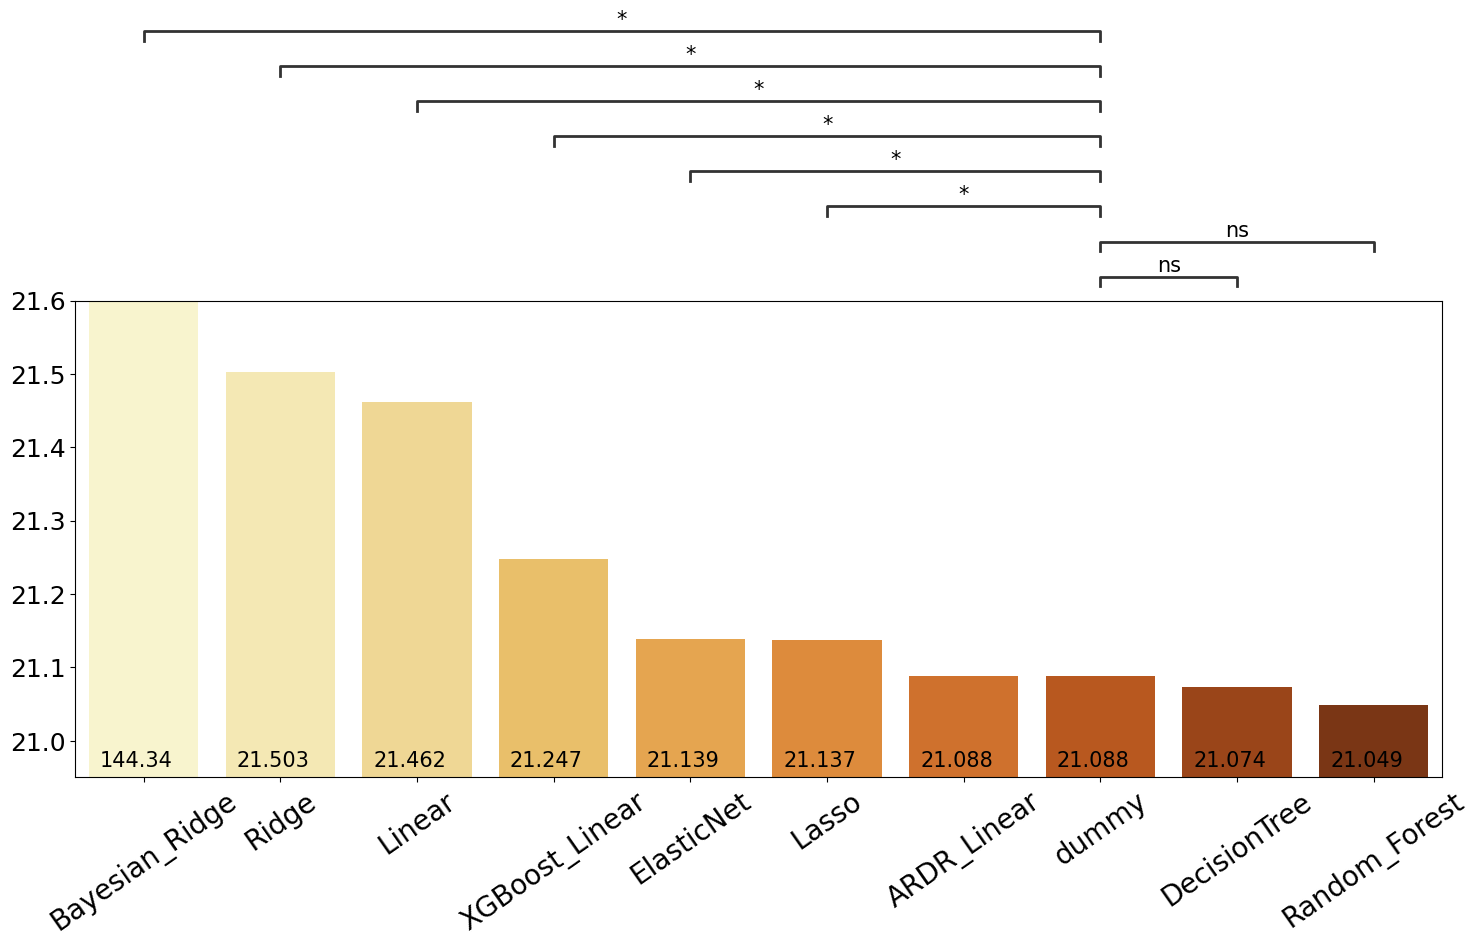

In [122]:
dum_idx = list(df_acc_test.iloc[:,0].values).index('dummy')
# sns.set_palette(color_palette('husl'))

# 파랑 
# cubehelix_palette = sns.cubehelix_palette(start = .5, rot = -.5, as_cmap = True)
# pal = sns.cubehelix_palette(n_colors=len(df_acc_test), start = .5, rot = -.5)
# https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/

# 주황 "YlOrBr"
# colors = ['#fff7bd']*(len(df_acc_test)-1) + ['#f48000']
# pal = sns.set_palette(sns.color_palette(colors))

_ = plt.figure(figsize=(15,12), dpi = 100)
_ = ax = sns.barplot(x = 'method', y = 'mse', data = df_cla_results, ci = None, capsize = None,
                order=df_cla_results.groupby('method').mean().sort_values('mse', ascending = False).index,
                palette = "YlOrBr") # palette = "YlOrBr", 'husl', pal


_ = ax.set(ylim = (20.95, 21.6))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 35, fontsize = 20)
_ = plt.setp(ax.get_yticklabels(), fontsize =18)
_ = ax.set_xlabel("", fontsize = 28)
_ = ax.set_ylabel("", fontsize = 25)

# dummy_mean = acc_df[acc_df.key=='dummy']['value'].values
# _ = ax.plot([-1,len(acc_df)], [dummy_mean, dummy_mean], color = 'red', linewidth = 2.3)
# _ = ax.annotate(text = f'dummy\n: {dummy_mean[0]:.4f}', xy = (2, dummy_mean), xytext = (0, 0.53),
#                arrowprops = dict(facecolor = 'red', shrink = 0), fontsize = 18)


_ = test_results = add_stat_annotation(ax, data = df_cla_results, x = 'method', y = 'mse',
                                   order=df_cla_results.groupby('method').mean().sort_values('mse', ascending = False).index,
                                   box_pairs = [(df_acc_test.iloc[i,0], df_acc_test.iloc[dum_idx,0]) for i in range(len(df_acc_test)) if i != dum_idx],
                                   test = 'Wilcoxon', text_format='star', comparisons_correction = None,
                                   loc = 'outside', verbose = 2, linewidth=2, fontsize=15)
### 기타 조정
val = mse_df['value'].sort_values(ascending = False).reset_index(drop = True)
cnt = 0
for i in range(len(mse_df)):
    tmp_fval = f'{val[i]:.3f}'
    if tmp_fval.index('.') == 3:
        _ = ax.text(cnt-0.32, 20.965, tmp_fval[:-1], fontsize=15)
    else:
        _ = ax.text(cnt-0.32, 20.965, tmp_fval, fontsize=15)
    cnt += 1
_ = plt.tight_layout()
plt.savefig('[15w] -5 10thr_hpt_mse_reg_pvalue_plot.png')

In [45]:
mse_df['value'].sort_values(ascending = False).reset_index(drop = True)

0     102.423099
1      21.444880
2      21.420027
3      21.091378
4      21.089920
5      21.089180
6      21.088499
7      21.088499
8      21.073801
9      21.065243
10     20.998665
Name: value, dtype: float64